In [1]:
#importing the packages
import tensorflow as tf
import numpy as np
import pandas as pd
%matplotlib inline
import math
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
# Remove regular python warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the train data
train = pd.read_csv("C:/Users/Rashmita Rout/Desktop/Multivariate/Digit Data/final/train.csv")
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
print(train.shape)

(42000, 785)


In [4]:
#importing the test data
test = pd.read_csv("C:/Users/Rashmita Rout/Desktop/Multivariate/Digit Data/final/test.csv")
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
print(test.shape)

(28000, 784)


In [6]:
#dividing the dataset into features and labels
train_features = train.drop(['label'],axis=1)
train_labels = train.label
test_features = test

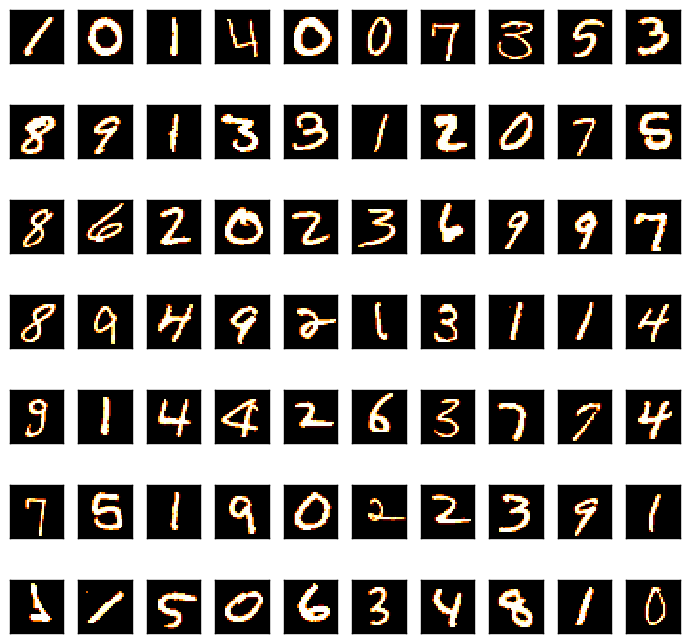

In [7]:
# plot some of the numbers
plt.figure(figsize=(7,7))
for digit_num in range(0,70):
    plt.subplot(7,10,digit_num+1)
    grid_data = train_features.iloc[digit_num].as_matrix().reshape(28,28)  # reshape from 1d to 2d pixel array
    plt.imshow(grid_data, interpolation = "none", cmap = "afmhot")
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()

In [8]:
#PCA is an unsupervised method for reducing the dimensionality of the existing 
#data set and extracting important information.
#We are selecting only 50 components
pca = PCA(n_components=50,whiten=True)
#fitting the train features
pca.fit(train_features)
#Transforming the train features and storing it as pca_train
pca_train = pca.transform(train_features)
#Transforming the test features and storing it as pca_test
pca_test = pca.transform(test_features)

In [9]:
from sklearn.svm import SVC
#Initialize the classifier
clf =SVC(kernel='rbf', C=1000, gamma=0.001)
#Fit the model
clffit = clf.fit(pca_train,train_labels)
#Predict the test labels
pred = clf.predict(pca_test)

#generating the submission file
#importing the predicted values into excel file in two columns "ImageId" and "label" 
final= pd.DataFrame()
final['ImageId']= range(1,28001,1)
final['label']= pred

#submitting the predicted values in a csv file
final.to_csv("C:/Users/Rashmita Rout/Desktop/Multivariate/Digit Data/final/result_1.csv",index=False)


In [ ]:
# using TensorFlow

In [10]:
train_x = train.drop(['label'], axis=1)
train_x = train_x.values.astype(dtype=np.float32)
train_x = train_x.reshape(42000, 28, 28, 1)

In [11]:
train_y = train['label'].tolist()
train_y = tf.one_hot(train_y, depth=10)
train_y = tf.Session().run(train_y).astype(dtype=np.float64)

In [12]:
test_x = test.values.astype(dtype=np.float32)
test_x = test_x.reshape(28000, 28, 28, 1)

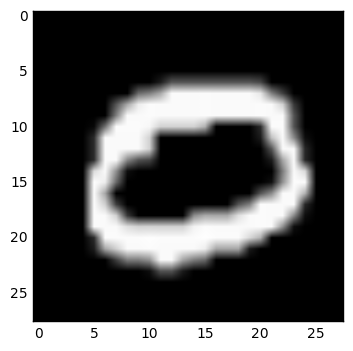

In [13]:
# Display an image read in from the CSV
pixels = test_x[1].reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

In [14]:
X = tf.placeholder(tf.float32, [None, 28, 28, 1])
Y_ = tf.placeholder(tf.float32, [None, 10])
W = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

In [15]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

In [16]:
def conv2d(X, W):
    return tf.nn.conv2d(X, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(X):
    return tf.nn.max_pool(X, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

In [17]:
#first convolution layer
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

x_image = tf.reshape(X, [-1,28,28,1])

h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

In [18]:
#second convolution layer
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

In [19]:
#densly connected layer
W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

In [20]:
#To reduce overfitting, we will apply dropout before the readout layer
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

In [21]:
#
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

In [22]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=y_conv, labels=Y_)
cross_entropy = tf.reduce_mean(cross_entropy)*100

# accuracy of the trained model, between 0 (worst) and 1 (best)
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(Y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
predictions = tf.argmax(y_conv, 1)

# training step, the learning rate is a placeholder
train_step = tf.train.AdamOptimizer(W).minimize(cross_entropy)

In [23]:
# init
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

def getBatch(i, size, trainFeatures, trainLabels):
    startIndex = (i * size) % 42000
    endIndex = startIndex + size
    batch_X = trainFeatures[startIndex : endIndex]
    batch_Y = trainLabels[startIndex : endIndex]
    return batch_X, batch_Y

# You can call this function in a loop to train the model, 100 images at a time
def training_step(i):

    # training on batches of 100 images with 100 labels
    size = 100
    batch_X, batch_Y = getBatch(i, size, train_x, train_y)

    # learning rate decay
    max_learning_rate = 0.003
    min_learning_rate = 0.0001
    decay_speed = 2000.0
    learning_rate = min_learning_rate + (max_learning_rate - min_learning_rate) * math.exp(-i/decay_speed)

    # compute training values
    if i % 100 == 0:
        a, c = sess.run([accuracy, cross_entropy], {X: batch_X, Y_: batch_Y, keep_prob: 1.0})
        print(str(i) + ": training accuracy:" + str(a) + " training loss: " + str(c) + " (W:" + str(learning_rate) + ")")

    # compute test values
    if i % 500 == 0:
        a, c = sess.run([accuracy, cross_entropy], {X: train_x[-10000:], Y_: train_y[-10000:], keep_prob: 1.0})
        print(str(i) + ": ********* test accuracy:" + str(a) + " test loss: " + str(c))

    # the backpropagation training step
    sess.run(train_step, {X: batch_X, Y_: batch_Y, W: learning_rate, keep_prob: 0.75})

# Run number of iterations training the NN    
for i in range(10000+1): 
    training_step(i)

0: training accuracy:0.14 training loss: 90016.3 (W:0.003)
0: ********* test accuracy:0.1086 test loss: 100150.0
100: training accuracy:0.75 training loss: 77.3057 (W:0.0028585653310520707)
200: training accuracy:0.8 training loss: 59.2267 (W:0.0027240285123042826)
300: training accuracy:0.89 training loss: 51.1457 (W:0.0025960531316326675)
400: training accuracy:0.82 training loss: 53.0918 (W:0.0024743191839261473)
500: training accuracy:0.91 training loss: 31.4537 (W:0.002358522270907074)
500: ********* test accuracy:0.8854 test loss: 35.594
600: training accuracy:0.92 training loss: 21.6808 (W:0.002248372839976982)
700: training accuracy:0.84 training loss: 48.957 (W:0.002143595460184269)
800: training accuracy:0.93 training loss: 26.1049 (W:0.002043928133503354)
900: training accuracy:0.94 training loss: 18.6864 (W:0.001949121639703143)
1000: training accuracy:0.91 training loss: 33.7635 (W:0.0018589389131666372)
1000: ********* test accuracy:0.9356 test loss: 20.732
1100: training

In [ ]:
# Get predictions on test data
pred = sess.run([predictions], {X: test_x, keep_prob: 1.0})

# Write predictions to csv file
results = pd.DataFrame({'ImageId': pd.Series(range(1, len(pred[0]) + 1)), 'Label': pd.Series(pred[0])})
results.to_csv('C:/Users/Rashmita Rout/Desktop/Multivariate/Digit Data/final/result_tf1.csv', index=False)